# Introduction

The purpose of this report is to carry out a preliminary analysis of two of the telecom operator, Megaline. Megaline offers its clients two prepaid plans, Surf and Ultimate. Each plans description is as follows:

**Surf** 

- Monthly charge is $20
- 500 monthly minutes, 50 texts, and 15 GB of data

After exceeding the package limits:
- 1 minute = 3 cents
- 1 text message = 3 cents
- 1 GB of data = $10

**Ultimate**
- Monthly charge is $70 
- 3000 monthly minutes, 1000 text messages, and 30 GB of data

After exceeding the package limits:
- 1 minute = 1 cent
- 1 text message = 1 cent
- 1 GB of data = $7

Megaline's commercial department requested an analysis based on a relatively small client selection to know which of the plans brings in more revenue in order to adjust the advertising budget. 

In the report hereinafter, I will study the clients, their residence, their prepaid plan and their plan usage, i.e. how many calls they made and how many minutes they used, how many messages they sent and the amount of data they used. 

To complete the analysis I will fix problematic values in the data, fill in missing values and add columns to the data set and remove duplicated rows, as required. Once the data set is preprocessed and clean, I will merge significant data from the various data frames provided into one data frame and calculate each user's the total minutes, messages and data used per month and the revenue they generated. Then I will determine whether there are outliers in the dataset, remove them as I deem necessery, and and categorize each user's region of residence. Then, I will draw conclusions in regards to the average revenue generated by the users of each plan - which prepaid plan generates in more revenue. 

## Description of the Data

Before I begin the analysis of the data frames, I will describe each of the data frames provided for the analysis in this report: 

**The calls table (data on calls):**
- id — unique call identifier
- call_date — call date
- duration — call duration (in minutes)
- user_id — the identifier of the user making the call 

**The internet table (data on web sessions):**
- id — unique session identifier
- mb_used — the volume of data spent during the session (in megabytes)
- session_date — web session date
- user_id — user identifier

**The messages table (data on texts):**
- id — unique text message identifier
- message_date — text message date
- user_id — the identifier of the user sending the text

**The plans table (data on the plans):**
- plan_name — calling plan name
- usd_monthly_fee — monthly charge in US dollars
- minutes_included — monthly minute allowance
- messages_included — monthly text allowance
- mb_per_month_included — data volume allowance (in megabytes)
- usd_per_minute — price per minute after exceeding the package limits (e.g., if the package includes 100 minutes, the 101st minute will be charged)
- usd_per_message — price per text after exceeding the package limits
- usd_per_gb — price per extra gigabyte of data after exceeding the package limits (1 GB = 1024 megabytes)

**The users table (data on users):**
- user_id — unique user identifier
- first_name — user's name
- last_name — user's last name
- age — user's age (years)
- reg_date — subscription date (dd, mm, yy)
- churn_date — the date the user stopped using the service (if the value is missing, the calling plan was being used when this data was retrieved)
- city — user's city of residence
- plan — calling plan name


## Loading and Initial Exploration of the Data

### Initialization

In [1]:
import random
import math as mt
import matplotlib
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
from random import sample
from functools import reduce
from scipy import stats as st
import matplotlib.pyplot as plt

### Loading of Data

Hereinafter I will load the 5 data frames and name them. 

In [2]:
calls = pd.read_csv('/Users/doronerlich/Desktop/Code ME/Course Project 3/megaline_calls.csv')
internet = pd.read_csv('/Users/doronerlich/Desktop/Code ME/Course Project 3/megaline_internet.csv')
messages = pd.read_csv('/Users/doronerlich/Desktop/Code ME/Course Project 3/megaline_messages.csv')
plans = pd.read_csv('/Users/doronerlich/Desktop/Code ME/Course Project 3/megaline_plans.csv')
users = pd.read_csv('/Users/doronerlich/Desktop/Code ME/Course Project 3/megaline_users.csv')

### Data Exploration

Now that the data was loaded, I will explore various of the data frames which I named:

- Calls - this data frame contains information in regards to the calls made by the users in 2018;
- Internet - this data frame contains information in regards to the volume of data spent during each session by the users in 2018;
- Messages - this data frame contains information in regards the amount of messages sent by the users in 2018;
- Plans - this data frame details each of the two plans available to the users, its limits and surchages when those limits are exceeded;
- Users - this data frame contains personal information about the users and the calling plan the bought.

#### Calls Data Frame

In [3]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [4]:
calls.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,137735,137735,1000_93,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
user_id,137735.0,NaN,NaN,NaN,1247.658046,139.416268,1000.0,1128.0,1247.0,1365.0,1499.0
call_date,137735,351,2018-12-27,1091,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,137735.0,NaN,NaN,NaN,6.745927,5.839241,0.0,1.29,5.98,10.69,37.6


In [5]:
calls.head(10)

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
5,1000_388,1000,2018-12-31,2.20
6,1000_510,1000,2018-12-27,5.75
7,1000_521,1000,2018-12-28,14.18
8,1000_530,1000,2018-12-28,5.77
9,1000_544,1000,2018-12-26,4.40


I have explored the calls data frame above. It should be noted that the data frame consists of 4 columns and 137735 rows as follows: 
- id — each call made by a user is given a unique identifier;
- call_date — each of the calls' date;
- duration — duration of each call in minutes;
- user_id — the number that identifies the user making the call, each user has a unique number and every user can have several calls in the data frame, his/her call id includes the user_id.

It should also be noted that it seems that this data frame has no missing (null) values, however using the describe() function we can see that there are some calls that have 0 duration. These may be due to technical error or hang ups by the user. 

Also not that the data frame consists of 3 data types: obj, int and float. The values in the id column and call_date are object data type when they should be int and datetime data type.


#### Internet Data Frame

In [6]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [7]:
internet.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,104825,104825,1000_13,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
user_id,104825.0,NaN,NaN,NaN,1242.496361,142.053913,1000.0,1122.0,1236.0,1367.0,1499.0
session_date,104825,351,2018-12-24,851,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mb_used,104825.0,NaN,NaN,NaN,366.713701,277.170542,0.0,136.08,343.98,554.61,1693.47


In [8]:
internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


I have explored the internet data frame above. It should be noted that the data frame consists of 4 columns and 104825 rows as follows: 
- id — each session made by a user is given a unique identifier;
- mb_used — the volume of data spent during the session (in megabytes, there are 1024 megabytes in 1 gigabyte);
- session_date — each of the sessions' date;
- user_id — the number that identifies the user in the particular session, each user has a unique number and every user can have several sessions in the data frame, his/her session id includes the user_id.

It should also be noted that it seems that this data frame has no missing (null) values, however using the describe() function we can see that there are some calls that have 0 duration. These may be due to technical error, or perhaps the user started a session that was initialized but no data was used. 

Also not that the data frame consists of 3 data types: obj, int and float. The values in the id column and session_date are object data type when they should be int and datetime data type.

#### Messages Data Frame

In [9]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [10]:
messages.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,76051,76051,1000_125,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
user_id,76051.0,NaN,NaN,NaN,1245.972768,139.843635,1000.0,1123.0,1251.0,1362.0,1497.0
message_date,76051,351,2018-12-28,702,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


I have explored the messages data frame above. It should be noted that the data frame consists of 3 columns and 76051 rows as follows: 
- id — each message sent by a user is given a unique identifier;
- user_id — the number that identifies each message that was sent, each user has a unique number and every user can send several messages, his/her session id includes the user_id;
- message_date — the date each message in the data frame was sent.

It should also be noted that it seems that this data frame has no missing (null) values.

Also not that the data frame consists of 2 data types: obj and int. The values in the id column and message_date are object data type when they should be int and datetime data type.

#### Plans Data Frame

In [12]:
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [13]:
plans.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
messages_included,2.0,NaN,NaN,NaN,525.0,671.751442,50.0,287.5,525.0,762.5,1000.0
mb_per_month_included,2.0,NaN,NaN,NaN,23040.0,10861.160159,15360.0,19200.0,23040.0,26880.0,30720.0
minutes_included,2.0,NaN,NaN,NaN,1750.0,1767.766953,500.0,1125.0,1750.0,2375.0,3000.0
usd_monthly_pay,2.0,NaN,NaN,NaN,45.0,35.355339,20.0,32.5,45.0,57.5,70.0
usd_per_gb,2.0,NaN,NaN,NaN,8.5,2.12132,7.0,7.75,8.5,9.25,10.0
usd_per_message,2.0,NaN,NaN,NaN,0.02,0.014142,0.01,0.015,0.02,0.025,0.03
usd_per_minute,2.0,NaN,NaN,NaN,0.02,0.014142,0.01,0.015,0.02,0.025,0.03
plan_name,2,2,surf,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


I have explored the plans data frame above. It should be noted that the data frame consists of 8 columns and 2 rows, one for the "surf" plan and the other for the "ultimate" plan, as follows: 
- plan_name — one of the two calling plans' name;
- usd_monthly_fee — monthly charge in US dollars for each plan;
- minutes_included — monthly minute allowance;
- messages_included — monthly text allowance;
- mb_per_month_included — data volume allowance (in megabytes);
- usd_per_minute — price per minute after exceeding the package limits (minutes_included);
- usd_per_message — price per text after exceeding the package limits (messages_included);
- usd_per_gb — price per extra gigabyte of data after exceeding the package limits (1 GB = 1024 megabytes).

It should also be noted that it seems that this data frame has no missing (null) values.

#### Users Data Frame

In [15]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [16]:
users.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
user_id,500.0,NaN,NaN,NaN,1249.5,144.481833,1000.0,1124.75,1249.5,1374.25,1499.0
first_name,500,458,Leonila,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last_name,500,399,David,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,500.0,NaN,NaN,NaN,45.486,16.972269,18.0,30.0,46.0,61.0,75.0
city,500,73,"New York-Newark-Jersey City, NY-NJ-PA MSA",80,NaN,NaN,NaN,NaN,NaN,NaN,NaN
reg_date,500,266,2018-03-08,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
plan,500,2,surf,339,NaN,NaN,NaN,NaN,NaN,NaN,NaN
churn_date,34,29,2018-12-18,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


I have explored the users data frame above. It should be noted that the data frame consists of 8 columns and 500 rows, as follows: 
- user_id — each user's identifier;
- first_name — the user's name;
- last_name — the user's last name;
- age — user's age in years;
- reg_date — the user's date of subscription;
- churn_date — the date the user stopped using the service;
- city — user's city of residence and state/region;
- plan — each of the users' purchased calling plan name.

It should be noted that this data frame has missing (null) values in the churn_date column, this means that the calling plan was being used when this data was retrieved for this analysis and that both of the column pretaining to dates are in incorrect data types. 

### Conclusions and Further Steps

From the data exploration above I can conclude the following:
- In 4 of the 5 data frames there are no missing (null) values - in the churn_date column in the users data frame.
- In 2 of the 5 data frames there are values that equal 0, in the duration and mb_used columns in the calls and internet data frames, respectively. 
- Every column in the data frames that contain a date is in obj data type. 

In this report, for the evantual purpose of analyzing the data set, I will:
- Fix the incorrect data types in each data frame (calls, internet, messages and users).
- Fill in the missing values in the churn_date column in the users data frame. Since more than 400 of the values are missing, I assume that the actual date in this column is irrelavant and will fill the missing values by turning the column into a column containing values of yes/no answers: was the plan used at the time of the retrieval of the data? 
- Once the data frames are clean, I will check whether each of the data frames has any duplicate rows and remove them as necessary. 
- I will add a "month" column to the calls, internet and messages data frames that will derive from the call_date, session_date and message_date columns, respectively. 
- Then, using the month I extracted in each data frame, I will calculate the amount of minutes accumulated, calls made, messages sent and data used by each user per month.
- I will categorize the users into two groups = users from the NY/NJ region and other regions and creat a slice of data containing each user's unique id, their region and plan. 
- Once all the preprocessing of the data frames is done, I will create a new data frame containing each user's sum of minutes, messages, data used, region and plan and calculate each user's monthly revenue. 
- I will check the core parameters of the merged data frame, determine what are the outliers in the data (if there are any) and whether to remove them or not. 
- Once I decide whether to remove the outliers or not, I will recheck the data frames core parameters per plan.

Finally, I will test the hypotheses of this report that the average revenue from users of Ultimate and Surf calling plans differs and that the average revenue from users in NY-NJ area is different from that of the users from other regions.

## Preprocessing the Data

As noted above, in this section I will address the following issues to prepare the data set for study and analysis:
- Fixing the data types of values in the data frames (mainly columns containing dates).
- Filling in the missing values in the churn_date column in the users data frame. 
- The values that equal 0 in the duration and mb_used columns in the calls and internet data frames, respectively, by either keeping them as they are, filling them in or removing them completely. 
- Look for duplicate rows in each data frame. 
- Adding a month column in the calls, internet and messages data frames. 
- Calculating the total amount of calls, minutes, messages and megabytes per user per month. 
- Categorizing the users into two groups of regions: NY/NJ and Other. 
- Merging the core parameters from each of the data frames that contain data pretaining to each of the users (calls, internet, messages and users). 
- Calculating each user's monthly revenue (plan fee and excess fee, if there is any). 

### Fixing Data Types

#### Calls Data Frame

In [18]:
calls.dtypes

id            object
user_id        int64
call_date     object
duration     float64
dtype: object

As we can see, there are two columns in which the values' data types need to be corrected: in the id column from object to int and in the call_date column to datetime. 

In [19]:
calls['id'] = calls['id'].astype(int)

In [20]:
calls['id'].dtypes

dtype('int64')

In [21]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')

In [22]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  int64         
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 4.2 MB


Using astype() and to_datetime, I have changed the data types of the values in the id column and call_date column to int and datetime, respectively. 

#### Internet Data Frame

In [23]:
internet.dtypes

id               object
user_id           int64
session_date     object
mb_used         float64
dtype: object

As we can see, there are two columns in which the values' data types need to be corrected: in the id column from object to int and in the session_date column to datetime. 

In [24]:
internet['id'] = internet['id'].astype(int)

In [25]:
internet['id'].dtypes

dtype('int64')

In [26]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')

In [27]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  int64         
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 3.2 MB


Using astype() and to_datetime, I have changed the data types of the values in the id column and session_date column to int and datetime, respectively. 

#### Messages Data Frame

In [28]:
messages.dtypes

id              object
user_id          int64
message_date    object
dtype: object

As we can see, there are two columns in which the values' data types need to be corrected: in the id column from object to int and in the message_date column to datetime.

In [29]:
messages['id'] = messages['id'].astype(int)

In [30]:
messages['id'].dtypes

dtype('int64')

In [31]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')

In [32]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  int64         
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.7 MB


Using astype() and to_datetime, I have changed the data types of the values in the id column and message_date column to int and datetime, respectively.

#### Users Data Frame

In [33]:
users.dtypes

user_id        int64
first_name    object
last_name     object
age            int64
city          object
reg_date      object
plan          object
churn_date    object
dtype: object

As we can see, both of the columns pretaining to dates of registration and when the user stopped being active are object when they should be datetime.

In [34]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')

In [35]:
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')

In [36]:
users.dtypes

user_id                int64
first_name            object
last_name             object
age                    int64
city                  object
reg_date      datetime64[ns]
plan                  object
churn_date    datetime64[ns]
dtype: object

Using to_datetime, I have changed the data type of the values in the reg_date and churn_date columns to datetime.

### Missing Values

Hereinafter I will check each data frame whether there are columns with null values and request a return of those column, if there are any. 

In [37]:
for i in calls:
    if calls[i].isnull().sum()>0:
        print(i)

In [38]:
for i in internet:
    if internet[i].isnull().sum()>0:
        print(i)

In [39]:
for i in messages:
    if messages[i].isnull().sum()>0:
        print(i)

In [40]:
for i in users:
    if users[i].isnull().sum()>0:
        print(i)

churn_date


Above, I confirmed what was noted in the data exploration section: of the 4 data frames containing data pretaining to the users, only column date_churn in the users data frame has null values. 

#### Missing Values in Users Data Frame

In [41]:
null_churn_date = users.loc[users['churn_date'].isnull()]

I have created a list of the users who have null values in the churn_date column in the users data frame. 

In [42]:
len(users)-len(null_churn_date)

34

In [43]:
len(null_churn_date)/len(users)

0.932

I have subtracted the rows with the null values from the data set and, using division, calculted the percentage of the row with missing values: there are only 34 rows where the value is not missing and missing rows amount to approx. 93% of the data frame. 

In [44]:
def assign_churn(churn_date):
    if churn_date == 0 or pd.isna(churn_date):
         return '1'
    else: return '0'

In [45]:
print(assign_churn(2018-12-18))

0


Considering the considerable amount of missing values (approx. 93%) and the fact that it is possible for a user to be charged if he/she resumes using the plan, I assumed that the date in the churn_date is insignificant and created a function where if the value in churn_date is null it will return 1 (meaning the plan is active) and if there is a value - to return 0 (i.e. not active). 

Then, I tested the function. Hereinafter, I will apply the function to the churn_date column and rename the column to "is_churned".  

In [46]:
users['churn_date'] = users['churn_date'].apply(assign_churn)

In [47]:
users.rename(columns={'churn_date':'is_churned'}, inplace = True)

In [48]:
users['is_churned'] = users['is_churned'].astype(int)

In [49]:
users['is_churned'].value_counts()

1    466
0     34
Name: is_churned, dtype: int64

In [50]:
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,is_churned
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,1
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,1
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,1
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,1
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,1


In [51]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   is_churned  500 non-null    int64         
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 31.4+ KB


Once I applied the function and renamed the column, to confirm that the function was applied correctly and the name of the column has changed, I rechecked the values, printed a sample of the data frame and the data frame's info. 

#### Values that Equal Zero

##### Calls Data Frame

In [52]:
calls[calls['duration'] <= 0]

,id,user_id,call_date,duration
19,10014,1001,2018-12-05,0.0
25,100113,1001,2018-12-24,0.0
31,100130,1001,2018-10-17,0.0
32,100131,1001,2018-11-03,0.0
34,100135,1001,2018-12-21,0.0
...,...,...,...,...
137714,1499183,1499,2018-11-10,0.0
137715,1499184,1499,2018-09-15,0.0
137720,1499189,1499,2018-12-27,0.0
137722,1499191,1499,2018-12-24,0.0


In [53]:
zero_duration = calls[calls['duration'] <= 0]

In [54]:
len(calls)-len(zero_duration)

110901

In [55]:
len(zero_duration)/len(calls)

0.1948233927469416

In the cells above, I located the abovementioned 0 values in the duration column in the calls data frame. There are 26834 rows in the data frame where there are 0 values and they consist of approx. 20% of the data frame, a fifth of the data. 

In [56]:
calls.groupby('user_id')['duration'].agg('sum').reset_index().sort_values('duration')

,user_id,duration
293,1306,4.60
33,1034,5.31
101,1104,8.73
308,1323,27.03
462,1481,33.19
...,...,...
305,1320,7202.87
346,1362,7451.17
319,1334,7675.17
76,1077,8024.09


To determine whether to remove these rows, I grouped and summed the duration column by the unique user's id - to see whether there are users who will be removed from the data frame if these rows were to be deleted. 

There are no users that their total amount of minutes equals 0. This also indicates that these calls are most likely hang ups and removing them won't affect the revenue generated by each user. 

In [57]:
no_null_calls = calls.loc[calls["duration"] != 0]

minutes used per user before and after removing 0 sessions


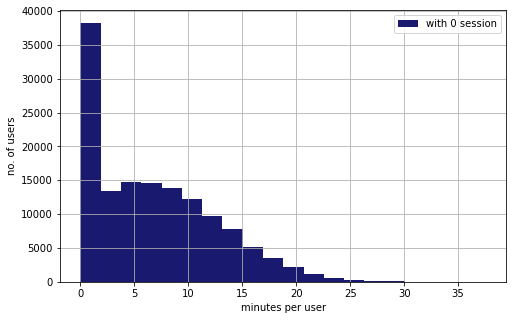

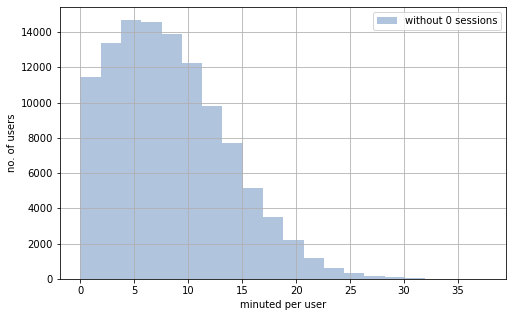

In [58]:
print("minutes used per user before and after removing 0 sessions")
calls['duration'].hist(bins=20, figsize=(8,5), color = "midnightblue")
plt.xlabel('minutes per user')
plt.ylabel('no. of users')
plt.legend(['with 0 session'])
plt.show()
no_null_calls['duration'].hist(bins=20, figsize=(8,5), color = "lightsteelblue")
plt.xlabel('minuted per user')
plt.ylabel('no. of users')
plt.legend(['without 0 sessions'])
plt.show()

I compared the data frame with and without the row with the 0 values, and decided that the 0 duration calls are outliers.

In [59]:
calls = no_null_calls

In [60]:
calls[calls['duration'] <= 0]

,id,user_id,call_date,duration


In [61]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110901 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         110901 non-null  int64         
 1   user_id    110901 non-null  int64         
 2   call_date  110901 non-null  datetime64[ns]
 3   duration   110901 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 4.2 MB


I replaced the calls data frame with the data frame without the rows with 0 values in the duration column, checked whether any such rows remained in the data frame and the data frame's info. Once those rows were removed, the data frame now consists of 110901 rows (instead of 137735). 

##### Internet Data Frame

In [62]:
internet[internet['mb_used'] <= 0]

,id,user_id,session_date,mb_used
1,1000204,1000,2018-12-31,0.0
14,100126,1001,2018-09-17,0.0
16,100128,1001,2018-10-17,0.0
34,100154,1001,2018-09-02,0.0
43,100177,1001,2018-10-31,0.0
...,...,...,...,...
104797,1499192,1499,2018-09-19,0.0
104804,1499199,1499,2018-12-09,0.0
104816,1499211,1499,2018-09-26,0.0
104817,1499212,1499,2018-09-11,0.0


In [63]:
zero_mb_used = internet[internet['mb_used'] <= 0]

In [64]:
len(internet)-len(zero_mb_used)

91078

In [65]:
len(zero_mb_used)/len(internet)

0.1311423801574052

In the cells above, I located the abovementioned 0 values in the duration column in the internet data frame. There are 13747 rows in the data frame where there are 0 values and they consist of approx. 13% of the data frame. 

In [66]:
internet.groupby('user_id')['mb_used'].agg('sum').reset_index().sort_values('mb_used')

,user_id,mb_used
444,1452,92.68
107,1108,233.17
301,1306,246.99
33,1034,997.42
316,1323,1024.85
...,...,...
141,1144,275045.28
182,1185,289533.36
352,1359,306503.85
265,1268,312518.64


To determine whether to remove these rows, I grouped and summed the duration column by the unique user's id - to see whether there are users who will be removed from the data frame if these rows were to be deleted. 

There are no users that their total amount of data used equals 0. This also indicates that these sessions never really materialized and removing them won't affect the revenue generated by each user. 

In [67]:
internet_no_null = internet.loc[internet["mb_used"] != 0]

MB used per user before and after removing 0 sessions


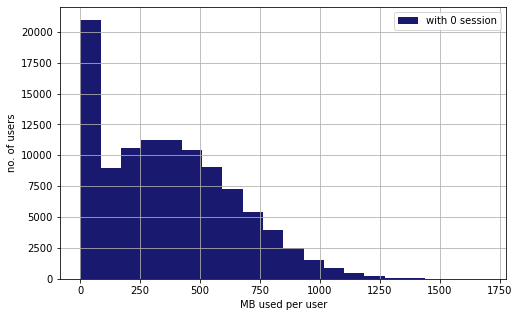

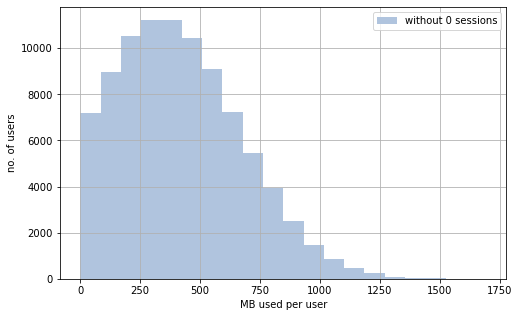

In [68]:
print("MB used per user before and after removing 0 sessions")
internet['mb_used'].hist(bins=20, figsize=(8,5), color = "midnightblue")
plt.xlabel('MB used per user')
plt.ylabel('no. of users')
plt.legend(['with 0 session'])
plt.show()
internet_no_null['mb_used'].hist(bins=20, figsize=(8,5), color = "lightsteelblue")
plt.xlabel('MB used per user')
plt.ylabel('no. of users')
plt.legend(['without 0 sessions'])
plt.show()

I compared the data frame with and without the row with the 0 values, and decided that the 0 duration calls are outliers.

In [69]:
internet = internet_no_null

In [70]:
internet[internet['mb_used'] <= 0]

,id,user_id,session_date,mb_used


In [71]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91078 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            91078 non-null  int64         
 1   user_id       91078 non-null  int64         
 2   session_date  91078 non-null  datetime64[ns]
 3   mb_used       91078 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 3.5 MB


I replaced the internet date frame with the data frame without the rows with 0 values in the duration column, checked whether any such rows remained in the data frame and the data frame's info. Once those rows were removed, the data frame now consists of 91078 rows (instead of 104825). 

### Looking for Duplicates

In [72]:
calls.duplicated().sum()

0

In [73]:
internet.duplicated().sum()

0

In [74]:
messages.duplicated().sum()

0

In [75]:
users.duplicated().sum()

0

I checked each data frame whether there are any duplicate rows and found none. 

### Enriching the Data (Adding Columns, Categorization and Grouping)

#### Adding a "Month"  Column

Hereinafter, I will check the minimum and maximum dates in the call_date, session_date and message_date in the calls, internet and messages data frames, respectively. Once I confirm that all the dates are in the year 2018, I will add a new column to each of the data frames indicating the month a call was made, data used and message sent.  

##### Calls Data Frame

In [76]:
calls['call_date'].min()

Timestamp('2018-01-15 00:00:00')

In [77]:
calls['call_date'].max()

Timestamp('2018-12-31 00:00:00')

In [78]:
calls['month'] = calls['call_date'].dt.month

In [79]:
calls.head()

,id,user_id,call_date,duration,month
0,100093,1000,2018-12-27,8.52,12
1,1000145,1000,2018-12-27,13.66,12
2,1000247,1000,2018-12-27,14.48,12
3,1000309,1000,2018-12-28,5.76,12
4,1000380,1000,2018-12-30,4.22,12


##### Internet Data Frame

In [80]:
internet['session_date'].min()

Timestamp('2018-01-15 00:00:00')

In [81]:
internet['session_date'].max()

Timestamp('2018-12-31 00:00:00')

In [82]:
internet['month'] = internet['session_date'].dt.month

In [83]:
internet.head()

,id,user_id,session_date,mb_used,month
0,100013,1000,2018-12-29,89.86,12
2,1000379,1000,2018-12-28,660.40,12
3,1000413,1000,2018-12-26,270.99,12
4,1000442,1000,2018-12-27,880.22,12
5,10010,1001,2018-08-24,284.68,8


##### Messages Data Frame

In [84]:
messages['message_date'].min()

Timestamp('2018-01-15 00:00:00')

In [85]:
messages['message_date'].max()

Timestamp('2018-12-31 00:00:00')

In [86]:
messages['month'] = messages['message_date'].dt.month

In [87]:
messages.head()

,id,user_id,message_date,month
0,1000125,1000,2018-12-27,12
1,1000160,1000,2018-12-31,12
2,1000223,1000,2018-12-31,12
3,1000251,1000,2018-12-27,12
4,1000255,1000,2018-12-26,12


I have created new "month" column in each of the data frames and sampled each data frame to confirm. Now, the calls data frame has 5 columns, the internet data frame 5 columns and the messages data frame 4 columns. 

#### Grouping Columns in of Each Data Frames

Hereinafter, for the purpose of examining each user's usage per month (and the eventual calculation of the revenue generated from each user per month) - I will group columns in each data frame.

##### Number of Calls Made per User per Month

In [88]:
calls_count = calls.groupby(['user_id', 'month'])['id'].count()

In [89]:
calls_count = pd.DataFrame(calls_count)

In [90]:
calls_count.rename(columns={'id':'count_calls_per_month'}, inplace = True)

In [91]:
calls_count.head()

count_calls_per_month
user_id month                       
1000    12                        16
1001    8                         22
        9                         38
        10                        47
        11                        49

I grouped and counted the id column in the calls data frame by user_id and month and saved the data in a new data frame called "calls_count". I printed a sample of the data frame. 

##### Minutes Each User Used per Month

In [92]:
calls['rounded'] = np.ceil(calls['duration'])

I added a column to the calls data frame containing each call's duration rounded up to whole minutes.

In [93]:
calls.head()

,id,user_id,call_date,duration,month,rounded
0,100093,1000,2018-12-27,8.52,12,9.0
1,1000145,1000,2018-12-27,13.66,12,14.0
2,1000247,1000,2018-12-27,14.48,12,15.0
3,1000309,1000,2018-12-28,5.76,12,6.0
4,1000380,1000,2018-12-30,4.22,12,5.0


I printed a sample of the calls data frame to check that the calls' duration was rounded up correctly. 

Hereinafter, I will group and sum the rounded calls' duration by user_id and month and save it in a new data frame called "calls_sum". 

In [94]:
calls_sum = calls.groupby(['user_id', 'month'])['rounded'].sum()

In [95]:
calls_sum = pd.DataFrame(calls_sum)

In [96]:
calls_sum.rename(columns={'rounded':'sum_minutes_per_month'}, inplace = True)

In [97]:
calls_sum.head()

sum_minutes_per_month
user_id month                       
1000    12                     124.0
1001    8                      182.0
        9                      315.0
        10                     393.0
        11                     426.0

I printed a sample of the new data frame, to check that everything's in order. 

##### Number of Text Messages Each User Sent Per Month

In [98]:
messages_count = messages.groupby(['user_id', 'month'])['id'].count()

In [99]:
messages_count = pd.DataFrame(messages_count)

In [100]:
messages_count.rename(columns={'id':'count_messages_per_month'}, inplace = True)

In [101]:
messages_count.head()

count_messages_per_month
user_id month                          
1000    12                           11
1001    8                            30
        9                            44
        10                           53
        11                           36

I grouped and counted the id column in the messages data frame by user_id and month and saved the data in a new data frame called "messages_count". I printed a sample of the data frame.

##### The Volume of Data per Month for Each User

In [102]:
data_sum = internet.groupby(['user_id', 'month'])['mb_used'].sum()

In [103]:
data_sum = pd.DataFrame(data_sum)

In [104]:
data_sum.rename(columns={'mb_used':'data_sum_per_month'}, inplace = True)

In [105]:
data_sum.head(5)

data_sum_per_month
user_id month                    
1000    12                1901.47
1001    8                 6919.15
        9                13314.82
        10               22330.49
        11               18504.30

I grouped and counted the mb_used column in the internet data frame by user_id and month, to calculate the amount of data used by each user per month, and saved the data in a new data frame called "data_sum". I printed a sample of the data frame.

In [106]:
data_sum['data_sum_per_month'] = (data_sum['data_sum_per_month']/1024).apply(np.ceil)

In [107]:
data_sum.head(5)

data_sum_per_month
user_id month                    
1000    12                    2.0
1001    8                     7.0
        9                    14.0
        10                   22.0
        11                   19.0

After creating the new data frame, I turned the megabytes to gigabytes by dividing the sum of mb by 1024 and rounded the sum up since each user's usage is calculated by whole gb. I printed a sample of the data frame. 

### Categorizing Each User's State

Hereinafter I will categorize each user's region of residence.

In [108]:
users['city'].value_counts()

New York-Newark-Jersey City, NY-NJ-PA MSA          80
Los Angeles-Long Beach-Anaheim, CA MSA             29
Dallas-Fort Worth-Arlington, TX MSA                21
Chicago-Naperville-Elgin, IL-IN-WI MSA             19
Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA    17
                                                   ..
Raleigh-Cary, NC MSA                                1
El Paso, TX MSA                                     1
Greensboro-High Point, NC MSA                       1
Stockton, CA MSA                                    1
Cape Coral-Fort Myers, FL MSA                       1
Name: city, Length: 73, dtype: int64

Above, I printed the value counts in the address column in the users data frame. 

In [109]:
def region_func(line):
  
    words = nltk.word_tokenize(line)
    lemmas = [wordnet_lemma.lemmatize(w, pos = 'n') for w in words]
    lemmas=[l.lower() for l in lemmas]
    
    if any(word in lemmas for word in NY_NJ_region):
        return 'NY/NJ'
    else:
        return 'Other_region'

Above I created a function by which if a word is in a "NY_NJ_region" category the return will be "NY/NJ", if the word is missing from the category the function will return "Other_region". 

In [110]:
import nltk
from nltk.stem import WordNetLemmatizer
from collections import Counter
wordnet_lemma = WordNetLemmatizer()

In [111]:
region='NY/NJ,Other'
words = nltk.word_tokenize(region)
print(words)
lemmas = [wordnet_lemma.lemmatize(w, pos = 'n') for w in words]
print(lemmas)

['NY/NJ', ',', 'Other']
['NY/NJ', ',', 'Other']


In [112]:
lemmas_list_all = []

for region in users['city'].unique():
    words = nltk.word_tokenize(region)
    lemmas = [wordnet_lemma.lemmatize(w, pos = 'n') for w in words]
    lemmas=[l.lower() for l in lemmas]
    for i in lemmas:
        lemmas_list_all.append(i)

In [113]:
lemmas_list_all

['atlanta-sandy',
 'springs-roswell',
 ',',
 'ga',
 'msa',
 'seattle-tacoma-bellevue',
 ',',
 'wa',
 'msa',
 'las',
 'vegas-henderson-paradise',
 ',',
 'nv',
 'msa',
 'tulsa',
 ',',
 'ok',
 'msa',
 'dallas-fort',
 'worth-arlington',
 ',',
 'tx',
 'msa',
 'san',
 'francisco-oakland-berkeley',
 ',',
 'ca',
 'msa',
 'grand',
 'rapids-kentwood',
 ',',
 'mi',
 'msa',
 'orlando-kissimmee-sanford',
 ',',
 'fl',
 'msa',
 'san',
 'jose-sunnyvale-santa',
 'clara',
 ',',
 'ca',
 'msa',
 'cleveland-elyria',
 ',',
 'oh',
 'msa',
 'chicago-naperville-elgin',
 ',',
 'il-in-wi',
 'msa',
 'knoxville',
 ',',
 'tn',
 'msa',
 'new',
 'york-newark-jersey',
 'city',
 ',',
 'ny-nj-pa',
 'msa',
 'pittsburgh',
 ',',
 'pa',
 'msa',
 'fresno',
 ',',
 'ca',
 'msa',
 'washington-arlington-alexandria',
 ',',
 'dc-va-md-wv',
 'msa',
 'indianapolis-carmel-anderson',
 ',',
 'in',
 'msa',
 'jacksonville',
 ',',
 'fl',
 'msa',
 'los',
 'angeles-long',
 'beach-anaheim',
 ',',
 'ca',
 'msa',
 'omaha-council',
 'bluffs',
 

In [114]:
Counter(lemmas_list_all)

Counter({'atlanta-sandy': 1,
         'springs-roswell': 1,
         ',': 73,
         'ga': 1,
         'msa': 73,
         'seattle-tacoma-bellevue': 1,
         'wa': 1,
         'las': 1,
         'vegas-henderson-paradise': 1,
         'nv': 1,
         'tulsa': 1,
         'ok': 2,
         'dallas-fort': 1,
         'worth-arlington': 1,
         'tx': 5,
         'san': 4,
         'francisco-oakland-berkeley': 1,
         'ca': 10,
         'grand': 1,
         'rapids-kentwood': 1,
         'mi': 2,
         'orlando-kissimmee-sanford': 1,
         'fl': 6,
         'jose-sunnyvale-santa': 1,
         'clara': 1,
         'cleveland-elyria': 1,
         'oh': 3,
         'chicago-naperville-elgin': 1,
         'il-in-wi': 1,
         'knoxville': 1,
         'tn': 2,
         'new': 3,
         'york-newark-jersey': 1,
         'city': 4,
         'ny-nj-pa': 1,
         'pittsburgh': 1,
         'pa': 1,
         'fresno': 1,
         'washington-arlington-alexandria': 1,
  

In [115]:
NY_NJ_region=['ny-nj-pa','york-newark-jersey','NY','ny','nj','NJ','JERSEY','jersey','newark','york','NEWARK','YORK']

I printed a list of the words in the address column and counted the frequency of each word. I located the words that indicate NY/NJ region and listed them in the "NY_NJ_region" category. 

In [116]:
users['region'] = users['city'].apply(region_func)

In [117]:
print(region_func('jersey'))

NY/NJ


In [118]:
users.region.value_counts()

Other_region    414
NY/NJ            86
Name: region, dtype: int64

In [119]:
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,is_churned,region
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,1,Other_region
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,1,Other_region
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,1,Other_region
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,1,Other_region
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,1,Other_region


I applied the function in a newly created column in the users data frame, "region". I check that the function works, counted the values and printed a sample of the data frame. 

### Users' Plans and Regions

In [120]:
user_plan = users[['user_id', 'plan', 'region']]

In [121]:
user_plan = pd.DataFrame(user_plan)

In [122]:
user_plan.head(10)

,user_id,plan,region
0,1000,ultimate,Other_region
1,1001,surf,Other_region
2,1002,surf,Other_region
3,1003,surf,Other_region
4,1004,surf,Other_region
5,1005,surf,Other_region
6,1006,ultimate,Other_region
7,1007,surf,Other_region
8,1008,ultimate,Other_region
9,1009,surf,Other_region


I created a new data frame containing each user's user id, plan and region. 

### Merging Data Frames

In [123]:
data_frames = [calls_sum, messages_count, data_sum]
merged_data = reduce(lambda  left,right: pd.merge(left,right,on=['user_id', 'month'],
                                            how='outer'), data_frames).reset_index(level=['user_id','month'])

Above, I created a list of three of the new data frames: calls_sum, messages_count and data_sum. I merged the data frames on the user_id and month columns (that are common to each of the data frames) into a new data frame called "merged_data".  

In [124]:
merged_data.head()

,user_id,month,sum_minutes_per_month,count_messages_per_month,data_sum_per_month
0,1000,12,124.0,11.0,2.0
1,1001,8,182.0,30.0,7.0
2,1001,9,315.0,44.0,14.0
3,1001,10,393.0,53.0,22.0
4,1001,11,426.0,36.0,19.0


In [125]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2293 entries, 0 to 2292
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   user_id                   2293 non-null   int64  
 1   month                     2293 non-null   int64  
 2   sum_minutes_per_month     2256 non-null   float64
 3   count_messages_per_month  1806 non-null   float64
 4   data_sum_per_month        2277 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 89.7 KB


In [126]:
merged_data['user_id'].value_counts()

1196    12
1185    12
1077    12
1362    12
1214    12
        ..
1225     1
1221     1
1218     1
1208     1
1108     1
Name: user_id, Length: 490, dtype: int64

In [127]:
merged_data.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
user_id,2293.0,1246.075883,143.051927,1000.0,1122.0,1245.0,1368.00,1499.0
month,2293.0,9.172700,2.496386,1.0,8.0,10.0,11.00,12.0
sum_minutes_per_month,2256.0,436.324025,231.711444,2.0,275.0,429.0,575.25,1510.0
count_messages_per_month,1806.0,42.110188,33.122931,1.0,17.0,34.0,59.00,266.0
data_sum_per_month,2277.0,16.989021,7.693683,1.0,13.0,17.0,21.00,70.0


I printed a sample of the new data frame and explored it using info(), value_counts() and describe() methods. The new data frame has 5 column and 2293 rows. It should be noted that there are 490 users and not all users used every aspect of the services provided (some haven't placed phone calls, sent messages or used any data). 

In [128]:
merged_users=pd.merge(left = merged_data, 
                right = user_plan, how='outer',on=['user_id']).fillna(0)

In [129]:
merged_users.head()

,user_id,month,sum_minutes_per_month,count_messages_per_month,data_sum_per_month,plan,region
0,1000,12.0,124.0,11.0,2.0,ultimate,Other_region
1,1001,8.0,182.0,30.0,7.0,surf,Other_region
2,1001,9.0,315.0,44.0,14.0,surf,Other_region
3,1001,10.0,393.0,53.0,22.0,surf,Other_region
4,1001,11.0,426.0,36.0,19.0,surf,Other_region


In [130]:
merged_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2303 entries, 0 to 2302
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   user_id                   2303 non-null   int64  
 1   month                     2303 non-null   float64
 2   sum_minutes_per_month     2303 non-null   float64
 3   count_messages_per_month  2303 non-null   float64
 4   data_sum_per_month        2303 non-null   float64
 5   plan                      2303 non-null   object 
 6   region                    2303 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 143.9+ KB


In [131]:
merged_users['month'] = merged_users['month'].astype(int)

In [132]:
merged_users['sum_minutes_per_month'] = merged_users['sum_minutes_per_month'].astype(int)

In [133]:
merged_users['count_messages_per_month'] = merged_users['count_messages_per_month'].astype(int)

In [134]:
merged_users['data_sum_per_month'] = merged_users['data_sum_per_month'].astype(int)

In [135]:
merged_users['data_sum_per_month'] = merged_users['data_sum_per_month'].astype(int)

In [136]:
merged_users.dtypes

user_id                      int64
month                        int64
sum_minutes_per_month        int64
count_messages_per_month     int64
data_sum_per_month           int64
plan                        object
region                      object
dtype: object

In [137]:
merged_users.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
user_id,2303.0,NaN,NaN,NaN,1246.214937,143.044136,1000.0,1122.0,1245.0,1368.0,1499.0
month,2303.0,NaN,NaN,NaN,9.13287,2.562964,0.0,8.0,10.0,11.0,12.0
sum_minutes_per_month,2303.0,NaN,NaN,NaN,427.419453,237.490294,0.0,262.5,424.0,571.5,1510.0
count_messages_per_month,2303.0,NaN,NaN,NaN,33.022579,34.065907,0.0,3.0,25.0,51.0,266.0
data_sum_per_month,2303.0,NaN,NaN,NaN,16.797221,7.857946,0.0,12.0,17.0,21.0,70.0
plan,2303,2,surf,1579,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region,2303,2,Other_region,1896,NaN,NaN,NaN,NaN,NaN,NaN,NaN


I merged the merged_data data frame with the data frame containing each user's plan and region, and saved it as a new data frame called "merged_users". In doing so, I also filled all null values in the data frame with 0.

I printed a sample of merged_users data frame and explored its parameters. Doing so, I noticed that the number of rows increased and the month column now has a minimum value of 0. 

In [138]:
null_users = merged_users.loc[merged_users["month"] == 0]

In [139]:
null_users.head(15)

,user_id,month,sum_minutes_per_month,count_messages_per_month,data_sum_per_month,plan,region
2293,1025,0,0,0,0,ultimate,Other_region
2294,1129,0,0,0,0,surf,Other_region
2295,1143,0,0,0,0,surf,Other_region
2296,1269,0,0,0,0,ultimate,Other_region
2297,1275,0,0,0,0,ultimate,NY/NJ
2298,1307,0,0,0,0,surf,Other_region
2299,1319,0,0,0,0,surf,Other_region
2300,1378,0,0,0,0,surf,Other_region
2301,1463,0,0,0,0,ultimate,Other_region
2302,1473,0,0,0,0,surf,Other_region


In [140]:
print(len(null_users)/len(merged_users))
print('---------------')
print(null_users['user_id'].isin(merged_data['user_id']))
print('---------------')
print(null_users.count())

0.004342162396873643
---------------
2293    False
2294    False
2295    False
2296    False
2297    False
2298    False
2299    False
2300    False
2301    False
2302    False
Name: user_id, dtype: bool
---------------
user_id                     10
month                       10
sum_minutes_per_month       10
count_messages_per_month    10
data_sum_per_month          10
plan                        10
region                      10
dtype: int64


I located the rows in merged_users data frame where the month equals 0, I checked to see if these rows were in the merged_data data frame. 

I surmised that the 10 rows are users that were in the users data frame that did not use any services - they have made no calls, sent no messages and used no data. Though it is unknown whether these users generate revenue, since they consist of only 10 rows I decided to remove these rows.

In [141]:
merged_users.drop(merged_users.index[2293:2303], inplace=True)

In [142]:
merged_users.loc[merged_users["month"] == 0]

,user_id,month,sum_minutes_per_month,count_messages_per_month,data_sum_per_month,plan,region


In [143]:
merged_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   user_id                   2293 non-null   int64 
 1   month                     2293 non-null   int64 
 2   sum_minutes_per_month     2293 non-null   int64 
 3   count_messages_per_month  2293 non-null   int64 
 4   data_sum_per_month        2293 non-null   int64 
 5   plan                      2293 non-null   object
 6   region                    2293 non-null   object
dtypes: int64(5), object(2)
memory usage: 143.3+ KB


In [144]:
merged_users.head()

,user_id,month,sum_minutes_per_month,count_messages_per_month,data_sum_per_month,plan,region
0,1000,12,124,11,2,ultimate,Other_region
1,1001,8,182,30,7,surf,Other_region
2,1001,9,315,44,14,surf,Other_region
3,1001,10,393,53,22,surf,Other_region
4,1001,11,426,36,19,surf,Other_region


I removed the rows containing 0 month, checked merged_users info and sample. All 10 rows were removed. 

### The Monthly Revenue Generated Per User Per Month

Hereinafter, I will calculate the revenue generated by each user.

The details of each plan: 

**Surf**
- Monthly charge: 20 Dollars
- 500 monthly minutes, 50 texts, and 15 GB of data

After exceeding the package limits:
- 1 minute: 3 cents
- 1 text message: 3 cents
- 1 GB of data: 10 Dollars

**Ultimate**
- Monthly charge: 70 Dollars
- 3000 monthly minutes, 1000 text messages, and 30 GB of data

After exceeding the package limits:
- 1 minute: 1 cent
- 1 text message: 1 cent
- 1 GB of data: 7 Dollars

In [145]:
def revenue_per_month(row):
    plan=row['plan']
    total_minutes=row['sum_minutes_per_month']
    total_messages=row['count_messages_per_month']
    data_sum_per_month=row['data_sum_per_month']
    
    if plan=='surf' and total_minutes >= 500:
        excess_minutes=total_minutes-500
    elif plan=='ultimate' and total_minutes >= 3000:
        excess_minutes=total_minutes-3000
    else:
        excess_minutes=0
    
    if plan=='surf' and total_messages >= 50:
        excess_messages=total_messages-50
    elif plan=='ultimate' and total_messages >= 1000:
        excess_messages=total_messages-1000
    else:
        excess_messages=0
        
    if plan=='surf' and data_sum_per_month >= 15:
        excess_data=data_sum_per_month-15
    elif plan=='ultimate' and data_sum_per_month >= 30:
        excess_data=data_sum_per_month-30
    else:
        excess_data=0
    
    if plan=='surf':
        excess_cost=((excess_minutes+excess_messages)*0.03)+(excess_data*10)
    elif plan=='ultimate':
        excess_cost=((excess_minutes+excess_messages)*0.01)+(excess_data*7)
    else:
        excess_cost=0
    
    if plan=='surf':
        revenue_per_month=excess_cost+20
    elif plan=='ultimate':
        revenue_per_month=excess_cost+70
    else:
        revenue_per_month=0
    
    return revenue_per_month

In [146]:
merged_users['revenue_per_month']=merged_users.apply(revenue_per_month,axis=1)

In [147]:
merged_users.loc[merged_users["revenue_per_month"] > 0]

,user_id,month,sum_minutes_per_month,count_messages_per_month,data_sum_per_month,plan,region,revenue_per_month
0,1000,12,124,11,2,ultimate,Other_region,70.00
1,1001,8,182,30,7,surf,Other_region,20.00
2,1001,9,315,44,14,surf,Other_region,20.00
3,1001,10,393,53,22,surf,Other_region,90.09
4,1001,11,426,36,19,surf,Other_region,60.00
...,...,...,...,...,...,...,...,...
2288,1204,12,0,78,36,ultimate,Other_region,112.00
2289,1349,10,0,76,13,surf,Other_region,20.78
2290,1349,11,0,72,17,surf,Other_region,40.66
2291,1349,12,0,61,13,surf,Other_region,20.33


I created a function that calculates the excess minutes, messages and the data used per user per month. The function works thus: if the plan is x the excess minutes and texts equals the total of each user's minutes and texts minus each plan's minutes and texts limits (550 or 1300). The function works similarly to calculate the excess data usage of each user per month. I defined this as the total excess usage of each user (excess_minutes_texts + excess_data). 

Then, I instructed the function to calculate the excess cost for each user per month, by multipling the each of the excess usages by their respective fees (3 cents and 10 dollars for "surf" plan and 1 cent and 7 dollars for "ultimate" plan). I defined this as "excess_cost".

Finally, for the purpose of calculating each user's generated revenue per month, I instructed the function to add each plan's monthly charge to the previously calculated excess cost. I applied the whole function to a new column, "revenue_per_month". 

and printed a sample where the value is greater than 0 to check that it was applied correctly. It did.

## Checking the Clean Data

In [148]:
merged_users.head(15)

,user_id,month,sum_minutes_per_month,count_messages_per_month,data_sum_per_month,plan,region,revenue_per_month
0,1000,12,124,11,2,ultimate,Other_region,70.00
1,1001,8,182,30,7,surf,Other_region,20.00
2,1001,9,315,44,14,surf,Other_region,20.00
3,1001,10,393,53,22,surf,Other_region,90.09
4,1001,11,426,36,19,surf,Other_region,60.00
5,1001,12,412,44,19,surf,Other_region,60.00
6,1002,10,59,15,7,surf,Other_region,20.00
7,1002,11,386,32,19,surf,Other_region,60.00
8,1002,12,384,41,15,surf,Other_region,20.00
9,1003,12,1104,50,27,surf,Other_region,158.12


I printed a sample of the merged_users data frame, the function I previously created and applied worked correctly.  

In [149]:
merged_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   user_id                   2293 non-null   int64  
 1   month                     2293 non-null   int64  
 2   sum_minutes_per_month     2293 non-null   int64  
 3   count_messages_per_month  2293 non-null   int64  
 4   data_sum_per_month        2293 non-null   int64  
 5   plan                      2293 non-null   object 
 6   region                    2293 non-null   object 
 7   revenue_per_month         2293 non-null   float64
dtypes: float64(1), int64(5), object(2)
memory usage: 161.2+ KB


In [150]:
merged_users.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
user_id,2293.0,NaN,NaN,NaN,1246.075883,143.051927,1000.0,1122.0,1245.0,1368.0,1499.0
month,2293.0,NaN,NaN,NaN,9.1727,2.496386,1.0,8.0,10.0,11.0,12.0
sum_minutes_per_month,2293.0,NaN,NaN,NaN,429.283471,236.320077,0.0,265.0,425.0,572.0,1510.0
count_messages_per_month,2293.0,NaN,NaN,NaN,33.166594,34.070085,0.0,3.0,26.0,51.0,266.0
data_sum_per_month,2293.0,NaN,NaN,NaN,16.870475,7.796174,0.0,12.0,17.0,21.0,70.0
plan,2293,2,surf,1573,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region,2293,2,Other_region,1887,NaN,NaN,NaN,NaN,NaN,NaN,NaN
revenue_per_month,2293.0,NaN,NaN,NaN,64.351147,46.624945,20.0,23.48,70.0,70.0,590.37


In the cells above I explored the clean data. 

## Studying Core Parameters

### Core Parameters and Determining Outliers

In [151]:
def core_parameters(parameter):
    print("The histogram of the {} column".format(parameter))
    merged_users[parameter].hist(color = "darkslateblue")
    plt.xlabel(parameter)
    plt.ylabel('no. of users')
    plt.show()
    print("The boxplots of the {} column".format(parameter))
    merged_users.boxplot(parameter)
    plt.ylabel('no. of users')
    plt.show()
    sns.boxplot(x=merged_users[parameter],showfliers = False,orient='v',color = "lavender")
    plt.xlabel(parameter)
    plt.ylabel('no. of users')
    plt.show()
    if merged_users[parameter].mean()>merged_users[parameter].median():
        print("The mean of the column is greater than its median, thus the distribution the {} column is skewed to the right".format(parameter))
    else:
        print("The median of the column is greater than its mean, thus the distribution the {} column is skewed to the left".format(parameter))
    print('---------------------------------------')
    print("The statistics of the {} column are as follows:".format(parameter))
    print(merged_users[parameter].describe())
    ninety_nine = np.percentile(merged_users[parameter], 99)
    one = np.percentile(merged_users[parameter], 1)
    print('---------------------------------------')
    print("The column's minimum border is",one)
    print("The column's maximum border is",ninety_nine)
    print('---------------------------------------')
    print("The outliers in the column are considered to be values below",one, "and above",ninety_nine)
    print("We have",len(merged_users[(merged_users[parameter]<one)|(merged_users[parameter]>ninety_nine)]),"values in the column that can be considered outliers")
    print()

The histogram of the sum_minutes_per_month column


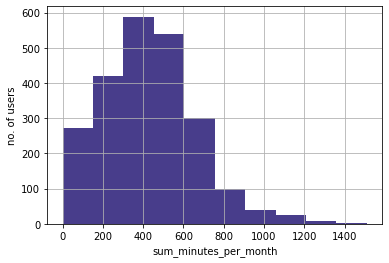

The boxplots of the sum_minutes_per_month column


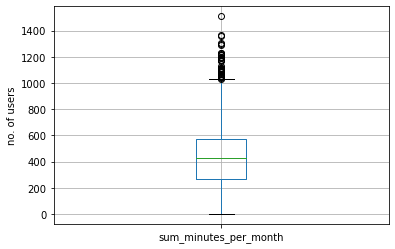

/Users/doronerlich/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


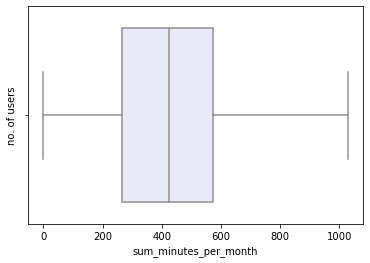

The mean of the column is greater than its median, thus the distribution the sum_minutes_per_month column is skewed to the right
---------------------------------------
The statistics of the sum_minutes_per_month column are as follows:
count    2293.000000
mean      429.283471
std       236.320077
min         0.000000
25%       265.000000
50%       425.000000
75%       572.000000
max      1510.000000
Name: sum_minutes_per_month, dtype: float64
---------------------------------------
The column's minimum border is 0.0
The column's maximum border is 1111.2399999999998
---------------------------------------
The outliers in the column are considered to be values below 0.0 and above 1111.2399999999998
We have 23 values in the column that can be considered outliers


----------------------------------------------------------------------

The histogram of the count_messages_per_month column


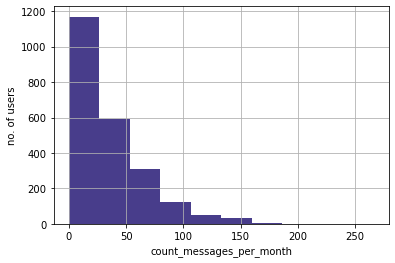

The boxplots of the count_messages_per_month column


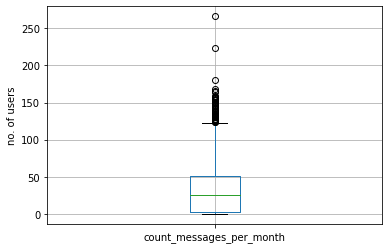

/Users/doronerlich/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


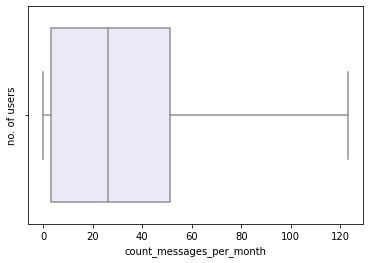

The mean of the column is greater than its median, thus the distribution the count_messages_per_month column is skewed to the right
---------------------------------------
The statistics of the count_messages_per_month column are as follows:
count    2293.000000
mean       33.166594
std        34.070085
min         0.000000
25%         3.000000
50%        26.000000
75%        51.000000
max       266.000000
Name: count_messages_per_month, dtype: float64
---------------------------------------
The column's minimum border is 0.0
The column's maximum border is 148.07999999999993
---------------------------------------
The outliers in the column are considered to be values below 0.0 and above 148.07999999999993
We have 23 values in the column that can be considered outliers


----------------------------------------------------------------------

The histogram of the data_sum_per_month column


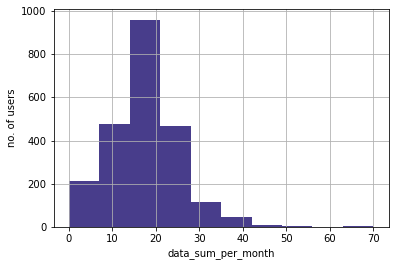

The boxplots of the data_sum_per_month column


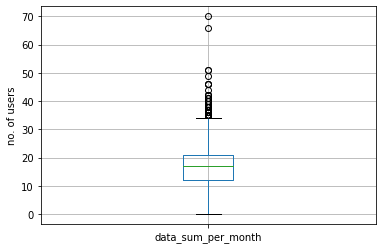

/Users/doronerlich/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


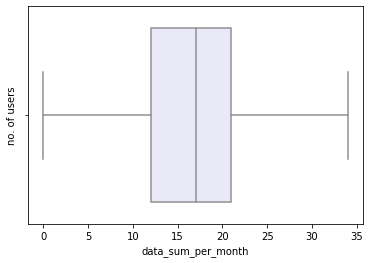

The median of the column is greater than its mean, thus the distribution the data_sum_per_month column is skewed to the left
---------------------------------------
The statistics of the data_sum_per_month column are as follows:
count    2293.000000
mean       16.870475
std         7.796174
min         0.000000
25%        12.000000
50%        17.000000
75%        21.000000
max        70.000000
Name: data_sum_per_month, dtype: float64
---------------------------------------
The column's minimum border is 1.0
The column's maximum border is 38.0
---------------------------------------
The outliers in the column are considered to be values below 1.0 and above 38.0
We have 36 values in the column that can be considered outliers



In [152]:
core_parameters('sum_minutes_per_month')
print()
print('----------------------------------------------------------------------')
print()
core_parameters('count_messages_per_month')
print()
print('----------------------------------------------------------------------')
print()
core_parameters('data_sum_per_month')

### Filtering the Data Set with Outliers

In [153]:
limits_list=[]
for parameter in ['sum_minutes_per_month', 'count_messages_per_month', 'data_sum_per_month']:
    ninety_nine = np.percentile(merged_users[parameter], 99)
    one = np.percentile(merged_users[parameter], 1)
    limits_list.append([parameter,one,ninety_nine])

In [154]:
limits_list

[['sum_minutes_per_month', 0.0, 1111.2399999999998],
 ['count_messages_per_month', 0.0, 148.07999999999993],
 ['data_sum_per_month', 1.0, 38.0]]

Based on the previous section that explores the core parameters in the data, I created a function that calculates the minimum and maximum limits of each of the core parameters in merged_users (minutes, messages and data per month per user) and printed the list it generated. 

In [155]:
filtered_merged_users = merged_users.copy()

In [156]:
filtered_merged_users = filtered_merged_users.query('0.0 <= sum_minutes_per_month and 0.0 <= count_messages_per_month and 1.0 <= data_sum_per_month')

In [157]:
filtered_merged_users = filtered_merged_users.query('sum_minutes_per_month <= 1111.2399999999998 and count_messages_per_month <= 148.07999999999993 and data_sum_per_month <= 39.0')


Based on the abovementioned limits, I created a copy of the merged_users data frame called, "filtered_merged_users" and sliced the data accordingly. 

### Comparing Core Parameters with/without Outliers

Hereinafter I will compare the data with and without the outliers. 

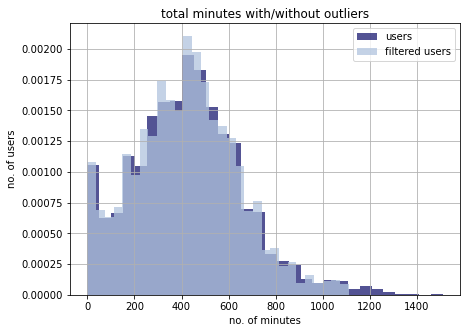


The statistics of the sum_minutes_per_month column are as follows:

The Column with Outliers
count    2293.000000
mean      429.283471
std       236.320077
min         0.000000
25%       265.000000
50%       425.000000
75%       572.000000
max      1510.000000
Name: sum_minutes_per_month, dtype: float64

The Column without Outliers
count    2218.000000
mean      420.302525
std       220.857867
min         0.000000
25%       263.000000
50%       420.000000
75%       564.000000
max      1111.000000
Name: sum_minutes_per_month, dtype: float64

----------------------------------------------------------------------



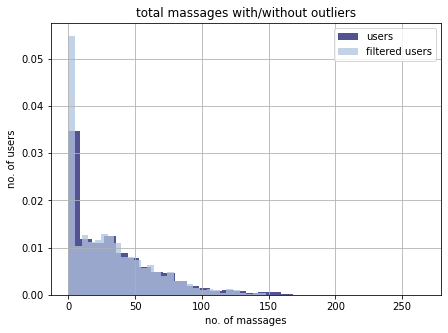


The statistics of the count_messages_per_month column are as follows:

The Column with Outliers
count    2293.000000
mean       33.166594
std        34.070085
min         0.000000
25%         3.000000
50%        26.000000
75%        51.000000
max       266.000000
Name: count_messages_per_month, dtype: float64

The Column without Outliers
count    2218.000000
mean       31.163210
std        30.653011
min         0.000000
25%         3.000000
50%        25.000000
75%        49.000000
max       148.000000
Name: count_messages_per_month, dtype: float64

----------------------------------------------------------------------



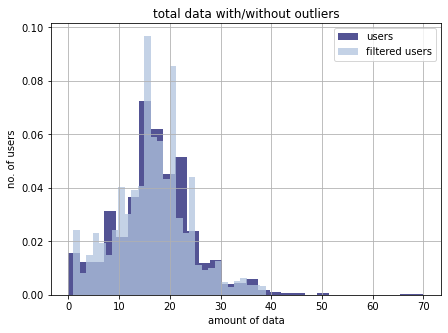


The statistics of the data_sum_per_month column are as follows:

The Column with Outliers
count    2293.000000
mean       16.870475
std         7.796174
min         0.000000
25%        12.000000
50%        17.000000
75%        21.000000
max        70.000000
Name: data_sum_per_month, dtype: float64

The Column without Outliers
count    2218.000000
mean       16.639766
std         7.161995
min         1.000000
25%        12.000000
50%        17.000000
75%        21.000000
max        39.000000
Name: data_sum_per_month, dtype: float64

----------------------------------------------------------------------



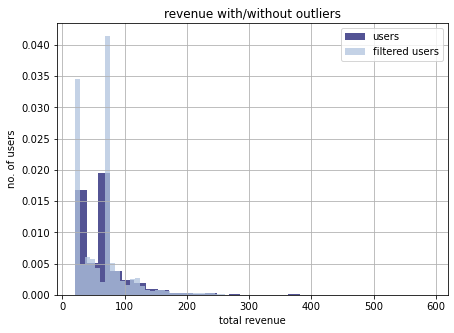


The statistics of the revenue_per_month column are as follows:

The Column with Outliers
count    2293.000000
mean       64.351147
std        46.624945
min        20.000000
25%        23.480000
50%        70.000000
75%        70.000000
max       590.370000
Name: revenue_per_month, dtype: float64

The Column without Outliers
count    2218.000000
mean       61.998986
std        39.542909
min        20.000000
25%        23.247500
50%        70.000000
75%        70.000000
max       260.630000
Name: revenue_per_month, dtype: float64


In [158]:
merged_users['sum_minutes_per_month'].hist(bins=30, figsize=(7,5), density=True, alpha=0.75, color = "midnightblue")
filtered_merged_users['sum_minutes_per_month'].hist(bins=30, figsize=(7,5), density=True, alpha=0.75, color = "lightsteelblue")
plt.title('total minutes with/without outliers')
plt.xlabel('no. of minutes')
plt.ylabel('no. of users')
plt.legend(['users', 'filtered users'])
plt.show()
print()
print("The statistics of the sum_minutes_per_month column are as follows:")
print()
print('The Column with Outliers')
print(merged_users.sum_minutes_per_month.describe(include='all').T)
print()
print('The Column without Outliers')
print(filtered_merged_users.sum_minutes_per_month.describe(include='all').T)
print()
print('----------------------------------------------------------------------')
print()
merged_users['count_messages_per_month'].hist(bins=30, figsize=(7,5), density=True,alpha=0.75, color = "midnightblue")
filtered_merged_users['count_messages_per_month'].hist(bins=30, figsize=(7,5), density=True,alpha=0.75, color = "lightsteelblue")
plt.title('total massages with/without outliers')
plt.xlabel('no. of massages')
plt.ylabel('no. of users')
plt.legend(['users', 'filtered users'])
plt.show()
print()
print("The statistics of the count_messages_per_month column are as follows:")
print()
print('The Column with Outliers')
print(merged_users.count_messages_per_month.describe(include='all').T)
print()
print('The Column without Outliers')
print(filtered_merged_users.count_messages_per_month.describe(include='all').T)
print()
print('----------------------------------------------------------------------')
print()
merged_users['data_sum_per_month'].hist(bins=30, figsize=(7,5), density=True,alpha=0.75, color = "midnightblue")
filtered_merged_users['data_sum_per_month'].hist(bins=30, figsize=(7,5), density=True,alpha=0.75, color = "lightsteelblue")
plt.title('total data with/without outliers')
plt.xlabel('amount of data')
plt.ylabel('no. of users')
plt.legend(['users', 'filtered users'])
plt.show()
print()
print("The statistics of the data_sum_per_month column are as follows:")
print()
print('The Column with Outliers')
print(merged_users.data_sum_per_month.describe(include='all').T)
print()
print('The Column without Outliers')
print(filtered_merged_users.data_sum_per_month.describe(include='all').T)
print()
print('----------------------------------------------------------------------')
print()
merged_users['revenue_per_month'].hist(bins=30, figsize=(7,5), density=True,alpha=0.75, color = "midnightblue")
filtered_merged_users['revenue_per_month'].hist(bins=30, figsize=(7,5), density=True,alpha=0.75, color = "lightsteelblue")
plt.title('revenue with/without outliers')
plt.xlabel('total revenue')
plt.ylabel('no. of users')
plt.legend(['users', 'filtered users'])
plt.show()
print()
print("The statistics of the revenue_per_month column are as follows:")
print()
print('The Column with Outliers')
print(merged_users.revenue_per_month.describe(include='all').T)
print()
print('The Column without Outliers')
print(filtered_merged_users.revenue_per_month.describe(include='all').T)

**Conclusions Concerning Outliers**

Once the core parameters were explored and the merged data frame and filtered data frame compared, I have decided not to remove the outliers (even though the outliers accont for only 75 rows).

## Studying Core Parameters by Plan

Describe the customers' behavior. Find the minutes, texts, and volume of data the users of each plan require per month. Calculate the mean, dispersion, and standard deviation. Plot histograms. Describe the distributions.

### Studying Core Parameters Total Amounts by Plan

In [159]:
def compare_parameters_total(parameter):
    print("The histogram comparison of the {} column".format(parameter))
    merged_users.query('plan == "surf"')[parameter].hist(bins=20, figsize=(7,5), color = "midnightblue")
    merged_users.query('plan == "ultimate"')[parameter].hist(bins=20, figsize=(7,5), color = "lightsteelblue")
    plt.title(parameter)
    plt.xlabel('total the {} column'.format(parameter))
    plt.ylabel('no. of users')
    plt.legend(['surf', 'ultimate'])
    plt.show()
    print("The statistics of the {} column are as follows:".format(parameter))
    print()
    print(merged_users.groupby(['plan'])[parameter].agg(['sum', 'mean', 'std', 'var']))
    

The distribution of the users are as follows:
surf        339
ultimate    161
Name: plan, dtype: int64

As we can see, there are twice as many users with the surf plan than users with the ultimate plan

----------------------------------------------------------------------

The histogram comparison of the sum_minutes_per_month column


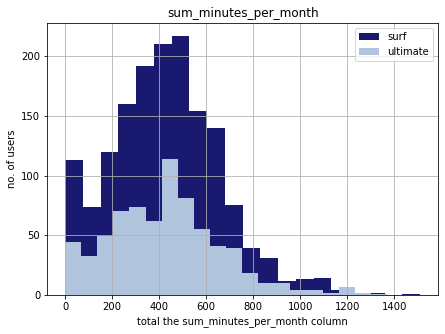

The statistics of the sum_minutes_per_month column are as follows:

             sum        mean         std           var
plan                                                  
surf      674423  428.749523  234.453150  54968.279461
ultimate  309924  430.450000  240.508762  57844.464812

Even though there are more than twice as many minutes used during 2018 by users of the surf plan than those in the ultimate plan - the ultimate plans' mean is greater, their standard deviations and variances are close and do not differ by much.

----------------------------------------------------------------------

The histogram comparison of the count_messages_per_month column


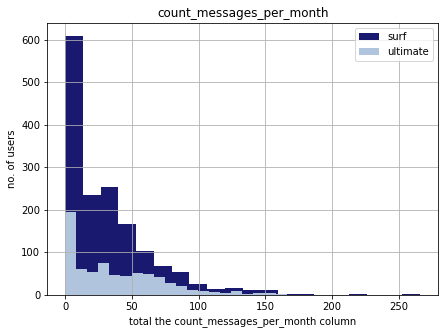

The statistics of the count_messages_per_month column are as follows:

            sum       mean        std          var
plan                                              
surf      49014  31.159568  33.566717  1126.724522
ultimate  27037  37.551389  34.767179  1208.756744

Users under the ultimate plan sent more messages during 2018, than those in the surf plan. Thus, their mean is greater. However, their standard deviations and variances are close and do not differ by much.

----------------------------------------------------------------------

The histogram comparison of the data_sum_per_month column


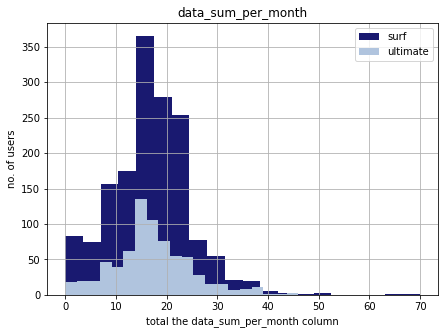

The statistics of the data_sum_per_month column are as follows:

            sum       mean       std       var
plan                                          
surf      26223  16.670693  7.847522  61.58360
ultimate  12461  17.306944  7.670108  58.83055

Even though the users under the surf plan used twice as many data as the users under the ultimate plan in 2018 - the plans' mean is fairly similar, as are their standard deviations and variances.



In [160]:
print("The distribution of the users are as follows:")
print(users['plan'].value_counts())
print()
print('As we can see, there are twice as many users with the surf plan than users with the ultimate plan')
print()
print('----------------------------------------------------------------------')
print()
compare_parameters_total('sum_minutes_per_month')
print()
print("Even though there are more than twice as many minutes used during 2018 by users of the surf plan than those in the ultimate plan - the ultimate plans' mean is greater, their standard deviations and variances are close and do not differ by much.")
print()
print('----------------------------------------------------------------------')
print()
compare_parameters_total('count_messages_per_month')
print()
print("Users under the ultimate plan sent more messages during 2018, than those in the surf plan. Thus, their mean is greater. However, their standard deviations and variances are close and do not differ by much.")
print()
print('----------------------------------------------------------------------')
print()
compare_parameters_total('data_sum_per_month')
print()
print("Even though the users under the surf plan used twice as many data as the users under the ultimate plan in 2018 - the plans' mean is fairly similar, as are their standard deviations and variances.")
print()


### Studying Core Parameters per Month by Plan

In [161]:
def compare_parameters_monthly(parameter):
    print("The histogram comparison of the {} column per plan".format(parameter))
    merged_users.pivot_table(index='month',values=[parameter], columns =['plan'], aggfunc=('sum')).plot(figsize=(8,5), align='edge', alpha=0.8, width = 0.75, kind='bar', 
                                                                                                         color = ("midnightblue", "lightsteelblue"))
    plt.title('sum of {} column'.format(parameter))
    plt.xlabel('month of the year 2018')
    plt.ylabel('{} column'.format(parameter))
    plt.legend(['surf', 'ultimate'])
    
    merged_users.pivot_table(index='month',values=[parameter], columns =['plan'], aggfunc=('mean')).plot(figsize=(8,5), align='edge', alpha=0.8, width = 0.75, kind='bar', 
                                                                                                         color = ("midnightblue", "lightsteelblue"))
    plt.title('mean of {} column'.format(parameter))
    plt.xlabel('month of the year 2018')
    plt.ylabel('{} column'.format(parameter))
    plt.legend(['surf', 'ultimate'])
    plt.show()
    
    print("The statistics of the {} column per plan are as follows:".format(parameter))
    print()
    print(merged_users.groupby(['month','plan'])[parameter].agg(['sum', 'mean', 'std', 'var']))

The histogram comparison of the sum_minutes_per_month column per plan


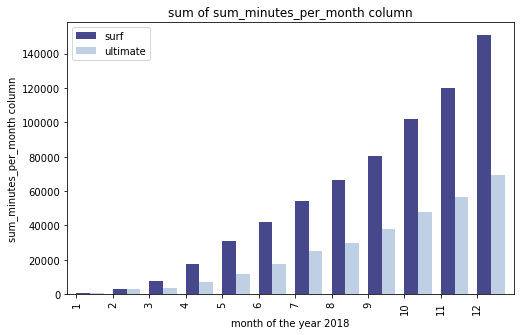

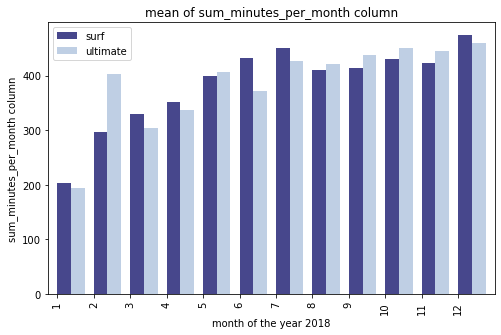

The statistics of the sum_minutes_per_month column per plan are as follows:

                   sum        mean         std           var
month plan                                                  
1     surf         406  203.000000  125.865007  15842.000000
      ultimate     774  193.500000  128.733575  16572.333333
2     surf        2673  297.000000  228.531179  52226.500000
      ultimate    2822  403.142857  277.289517  76889.476190
3     surf        7590  330.000000  189.233622  35809.363636
      ultimate    3651  304.250000  248.967732  61984.931818
4     surf       17577  351.540000  225.536567  50866.743265
      ultimate    7074  336.857143  186.785783  34888.928571
5     surf       30768  399.584416  244.446763  59754.219754
      ultimate   11781  406.241379  209.382537  43841.046798
6     surf       41836  431.298969  213.524304  45592.628436
      ultimate   17435  370.957447  206.163924  42503.563367
7     surf       54448  449.983471  246.992105  61005.099725
      ul

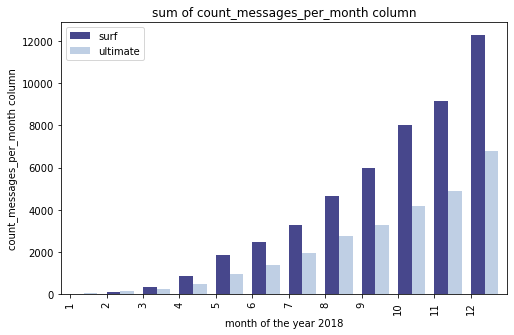

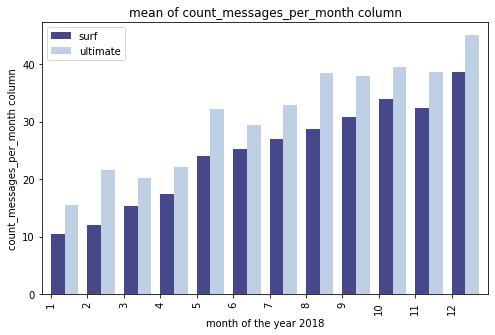

The statistics of the count_messages_per_month column per plan are as follows:

                  sum       mean        std          var
month plan                                              
1     surf         21  10.500000  14.849242   220.500000
      ultimate     62  15.500000  17.710637   313.666667
2     surf        108  12.000000  19.646883   386.000000
      ultimate    151  21.571429  21.869744   478.285714
3     surf        351  15.260870  18.616262   346.565217
      ultimate    243  20.250000  25.580977   654.386364
4     surf        870  17.400000  22.396246   501.591837
      ultimate    463  22.047619  23.326972   544.147619
5     surf       1849  24.012987  29.106652   847.197198
      ultimate    931  32.103448  36.018195  1297.310345
6     surf       2454  25.298969  30.247646   914.920103
      ultimate   1379  29.340426  29.285162   857.620722
7     surf       3271  27.033058  30.395979   923.915565
      ultimate   1937  32.830508  30.991741   960.488019
8     su

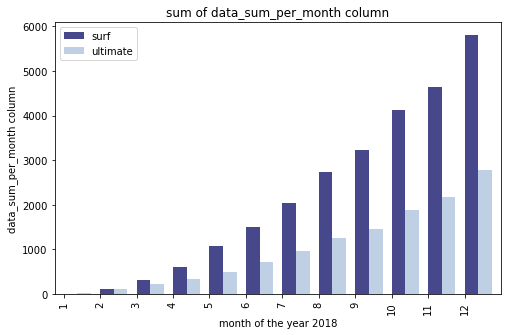

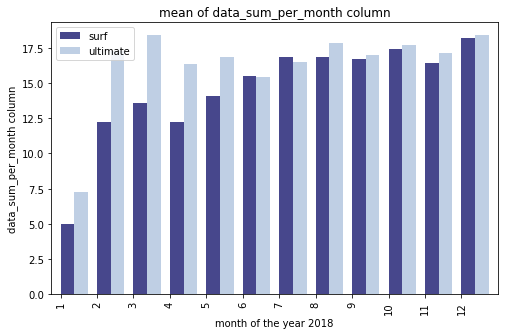

The statistics of the data_sum_per_month column per plan are as follows:

                 sum       mean        std         var
month plan                                            
1     surf        10   5.000000   4.242641   18.000000
      ultimate    29   7.250000   3.862210   14.916667
2     surf       110  12.222222   6.437736   41.444444
      ultimate   121  17.285714   6.156684   37.904762
3     surf       312  13.565217   7.999012   63.984190
      ultimate   221  18.416667  11.774073  138.628788
4     surf       611  12.220000   7.497728   56.215918
      ultimate   343  16.333333   9.264628   85.833333
5     surf      1087  14.116883   7.627813   58.183527
      ultimate   489  16.862069   7.361697   54.194581
6     surf      1502  15.484536   6.910308   47.752363
      ultimate   725  15.425532   8.298100   68.858464
7     surf      2042  16.876033   7.840674   61.476171
      ultimate   973  16.491525   8.015874   64.254237
8     surf      2735  16.882716   8.451091   7

In [162]:
compare_parameters_monthly('sum_minutes_per_month')
print()
print("As we can, the users under the surf plan consistently talked more, and talked more each month, than the users under the ultimate plan. However, the means of the minutes per plan every month is close - except in February were the minutes mean of the ultimate plan is greater.")
print()
print('----------------------------------------------------------------------')
print()
compare_parameters_monthly('count_messages_per_month')
print()
print("The users under the surf plan sent more messages than users under the ultimate plan every month of 2018. However, the mean of messages sent by the users under the ultimate plan each month is greater every month of the year.")
print()
print('----------------------------------------------------------------------')
print()
compare_parameters_monthly('data_sum_per_month')
print()
print("Again, the users under the surf plan used more data each month. However, in February, March, April and May the ultimate plan's usage mean is significantly higher (espcially when you take into account that the other plan has twice as many users) and in other months the mean is fairly similar.")

## Testing the Hypotheses

In this report we must test two hypotheses concerning the revenue generated from the users:
1. The Plan Hypothsis.
2. The Region Hypothsis. 

The distribution of the users are as follows:
surf        339
ultimate    161
Name: plan, dtype: int64

As we can see, there are twice as many users with the surf plan than users with the ultimate plan

----------------------------------------------------------------------

The histogram comparison of the revenue_per_month column


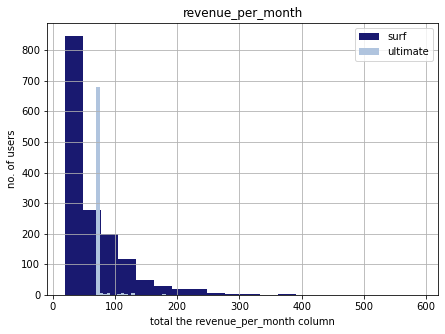

The statistics of the revenue_per_month column are as follows:

               sum       mean        std          var
plan                                                 
surf      95491.18  60.706408  55.388042  3067.835152
ultimate  52066.00  72.313889  11.395108   129.848486


In [163]:
print("The distribution of the users are as follows:")
print(users['plan'].value_counts())
print()
print('As we can see, there are twice as many users with the surf plan than users with the ultimate plan')
print()
print('----------------------------------------------------------------------')
print()
compare_parameters_total('revenue_per_month')

### The Plan Hypothesis


The null hypothesis is that there is no difference between the average revenue generated by the users under the surf plan and the ultimate plan. The alternative hypothesis is that the two plans generate a different average of revenue. 

Thus, in this section I will test the null hypothesis that there is no difference between the two and either reject this hypothesis or determine that I can't reject it. 


#### Creating a List of Surf Plan's Revenue Mean

In [164]:
surf_revenue = merged_users.query('plan == "surf"')['revenue_per_month'].reset_index()
print(surf_revenue)

      index  revenue_per_month
0         1              20.00
1         2              20.00
2         3              90.09
3         4              60.00
4         5              60.00
...     ...                ...
1568   2285             290.36
1569   2286             180.18
1570   2289              20.78
1571   2290              40.66
1572   2291              20.33

[1573 rows x 2 columns]


I sliced a pivot table from the merged_users_pivot pivot table that consists of only the users under the surf plan that includes their unique user id, their region of residence and the average revenue they generated during 2018. 

In [165]:
surf_revenue_list=list(surf_revenue['revenue_per_month'].round(2))
print(surf_revenue_list)

[20.0, 20.0, 90.09, 60.0, 60.0, 20.0, 60.0, 20.0, 158.12, 20.0, 80.0, 110.0, 150.0, 60.0, 20.0, 90.0, 80.0, 40.0, 110.03, 150.0, 244.62, 110.72, 163.51, 71.02, 69.69, 181.4, 116.93, 88.28, 107.2, 126.42, 117.68, 20.0, 74.68, 30.96, 41.59, 25.94, 74.11, 43.03, 46.33, 20.0, 20.0, 20.0, 20.0, 38.84, 50.54, 20.0, 144.47, 160.11, 20.0, 110.0, 150.0, 60.0, 80.0, 20.0, 24.08, 40.0, 20.0, 152.34, 20.0, 70.0, 20.0, 20.0, 100.0, 20.0, 83.93, 20.3, 62.22, 90.0, 52.55, 20.0, 20.0, 21.92, 20.0, 70.0, 40.0, 20.0, 30.0, 20.0, 20.0, 27.89, 55.76, 24.14, 83.96, 20.0, 34.29, 40.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 90.0, 80.0, 110.0, 30.0, 20.0, 122.01, 43.69, 20.0, 90.3, 120.21, 120.66, 132.28, 120.0, 24.32, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.3, 20.06, 167.48, 20.0, 80.0, 90.0, 40.0, 70.33, 30.0, 20.0, 50.0, 80.0, 30.0, 110.0, 70.0, 80.0, 80.0, 100.0, 20.0, 20.54, 30.87, 21.32, 20.72, 70.66, 21.35, 30.84, 20.

I converted the users of the surf plan's average revenue into a list and rounded the numbers to two digits after the decimal. 

#### Creating a List of Ultimate Plan's Revenue Mean

In [166]:
ultimate_revenue = merged_users.query('plan == "ultimate"')['revenue_per_month'].reset_index()
print(ultimate_revenue)

     index  revenue_per_month
0        0               70.0
1       19               70.0
2       20               84.0
3       26               70.0
4       27               70.0
..     ...                ...
715   2231               70.0
716   2247               70.0
717   2287               70.0
718   2288              112.0
719   2292               70.0

[720 rows x 2 columns]


I sliced a pivot table from the merged_users_pivot pivot table that consists of only the users under the ultimate plan that includes their unique user id, their region of residence and the average revenue they generated during 2018. 

In [167]:
ultimate_revenue_list=list(ultimate_revenue['revenue_per_month'].round(2))
print(ultimate_revenue_list)

[70.0, 70.0, 84.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 112.0, 119.0, 91.0, 126.0, 126.0, 140.0, 70.0, 182.0, 154.0, 119.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 126.0, 168.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 84.0, 77.0, 91.0, 126.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 105.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.

I converted the users of the ultimate plan's average revnue into a list and rounded the numbers to two digits after the decimal. 

#### Testing the Plan Hypothsis

Hereinafter I will test the hypothesis that there is a difference between the average revenue generated by the users of the surf plan and by the average revenue generated by the users of the ultimate plan. 

In [168]:
random_sample_surf = sample(surf_revenue_list,150)

random_sample_ultimate = sample(ultimate_revenue_list,150)

alpha = 0.05  # critical statistical significance level
# if the p-value is less than alpha, we reject the hypothesis

results = st.ttest_ind(random_sample_surf, random_sample_ultimate)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis") 

print("Surf plan's average revenue is ${:.2f}".format(surf_revenue['revenue_per_month'].mean()))
print("Ultimate plan's average revenue is ${:.2f}".format(ultimate_revenue['revenue_per_month'].mean()))

p-value:  0.0002623982370552971
We reject the null hypothesis
Surf plan's average revenue is $60.71
Ultimate plan's average revenue is $72.31


#### Conclusions Concerning The Plan Hypothesis


I sampled 150 random values from each plans' users' average revenue and set the alpha, the critical statistical significance level, at 0.05 (5%). The p-value is the probability that the null hypothesis is true.
    

If the p-value is greater than the alpha, we can't reject the null hypothhsis that there is no difference between the revenue generated by the two groups. However, if the alpha is greater than the p-value, the null hypothesis is rejected - meaning that we can't determine that there is no difference between the average revenue generated by the two groups. 
    

**The null hypothesis was rejected - thus, there is a difference between the revenue generated by the two plans.**


### The Region Hypothesis

In this section I will test the null hypothesis that there is a difference between the revenue generated by the users in the NY/NJ region and users from other regions and determine whether I can reject this hypothesis or not.

#### Creating a List of NY/NJ Region's Revenue Mean

In [169]:
ny_nj_revenue = merged_users.query('region == "NY/NJ"')['revenue_per_month'].reset_index()
print(ny_nj_revenue)

     index  revenue_per_month
0       56              20.00
1       57              38.84
2       75              20.00
3       76             100.00
4       77              20.00
..     ...                ...
401   2263              80.00
402   2264             120.42
403   2265             170.27
404   2266             200.00
405   2267             110.33

[406 rows x 2 columns]


I sliced a pivot table from the merged_users_pivot pivot table that consists of only the users from the NY/NJ region that includes their unique user id, their plan and the average revenue they generated during 2018. 

In [170]:
ny_nj_revenue_list=list(ny_nj_revenue['revenue_per_month'].round(2))
print(ny_nj_revenue_list)

[20.0, 38.84, 20.0, 100.0, 20.0, 83.93, 20.3, 62.22, 90.0, 52.55, 21.92, 20.0, 70.0, 40.0, 20.0, 30.0, 20.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 20.0, 70.0, 70.0, 70.0, 84.0, 77.0, 91.0, 126.0, 20.0, 122.01, 43.69, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 80.0, 90.0, 40.0, 70.33, 30.0, 70.0, 70.0, 20.0, 30.0, 93.96, 41.89, 54.32, 20.84, 50.0, 20.0, 20.0, 20.0, 20.0, 20.0, 60.0, 20.0, 50.0, 20.0, 20.0, 72.46, 20.63, 20.0, 21.26, 20.0, 80.0, 20.0, 123.18, 102.85, 83.27, 82.67, 32.46, 20.0, 90.86, 55.49, 47.59, 26.09, 31.19, 70.0, 70.0, 50.03, 162.97, 185.49, 181.17, 161.44, 20.0, 86.84, 30.84, 80.36, 20.0, 20.0, 40.0, 40.0, 70.45, 26.57, 31.32, 20.0, 60.0, 40.42, 120.0, 90.69, 20.0, 60.18, 63.09, 112.79, 150.12, 60.0, 121.86, 92.07, 70.0, 70.0, 20.0, 20.0, 22.16, 70.69, 20.42, 20.0, 23.06, 20.0, 20.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 20.0, 87.98, 25.34, 37.92, 145.73, 59.51, 100.0, 100.0, 90.0, 90.0, 60.0, 150.09, 50.0, 80.0, 60.15, 20.0, 90.0, 80.0, 130.0, 11

I converted the users of the ultimate plan's average revnue into a list and rounded the numbers to two digits after the decimal.

#### Creating a List of Other Region's Revenue Mean

In [171]:
other_region_revenue = merged_users.query('region == "Other_region"')['revenue_per_month'].reset_index()
print(other_region_revenue)

      index  revenue_per_month
0         0              70.00
1         1              20.00
2         2              20.00
3         3              90.09
4         4              60.00
...     ...                ...
1882   2288             112.00
1883   2289              20.78
1884   2290              40.66
1885   2291              20.33
1886   2292              70.00

[1887 rows x 2 columns]


I sliced a pivot table from the merged_users_pivot pivot table that consists of only the users regions that are not NY/NJ that includes their unique user id, their plan and the average revenue they generated during 2018. 

In [172]:
other_region_revenue_list=list(other_region_revenue['revenue_per_month'].round(2))
print(other_region_revenue_list)

[70.0, 20.0, 20.0, 90.09, 60.0, 60.0, 20.0, 60.0, 20.0, 158.12, 20.0, 80.0, 110.0, 150.0, 60.0, 20.0, 90.0, 80.0, 40.0, 70.0, 84.0, 110.03, 150.0, 244.62, 110.72, 163.51, 70.0, 70.0, 70.0, 71.02, 69.69, 181.4, 116.93, 88.28, 107.2, 126.42, 117.68, 20.0, 74.68, 30.96, 41.59, 25.94, 74.11, 43.03, 46.33, 20.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 20.0, 20.0, 70.0, 50.54, 20.0, 144.47, 160.11, 20.0, 110.0, 150.0, 60.0, 80.0, 20.0, 24.08, 40.0, 20.0, 152.34, 20.0, 70.0, 20.0, 20.0, 20.0, 70.0, 70.0, 112.0, 119.0, 91.0, 126.0, 126.0, 140.0, 70.0, 182.0, 154.0, 119.0, 70.0, 20.0, 27.89, 55.76, 24.14, 83.96, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 34.29, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 126.0, 168.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 40.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 90.0, 80.0, 110.0, 30.0, 20.0, 90.3, 120.21, 120.66, 132.28, 120.0, 24.3

I converted the users of the ultimate plan's average revnue into a list and rounded the numbers to two digits after the decimal.

#### Testing the Region Hypothsis

Hereinafter I will test the hypothesis that there is a difference between the average revenue generated by the users from the NY/NJ region and by the average revenue generated by the users from other regions. 

In [173]:
random_sample_ny_nj = sample(ny_nj_revenue_list,150)

random_sample_other = sample(other_region_revenue_list,150)

alpha = 0.05  # critical statistical significance level
# if the p-value is less than alpha, we reject the hypothesis

results = st.ttest_ind(random_sample_ny_nj, random_sample_other)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis") 

print("NY/NJ region average revenue is ${:.2f}".format(ny_nj_revenue['revenue_per_month'].mean()))
print("Other regions' average revenue is ${:.2f}".format(other_region_revenue['revenue_per_month'].mean()))

p-value:  0.16994487379175097
We can't reject the null hypothesis
NY/NJ region average revenue is $60.90
Other regions' average revenue is $65.09


#### Conclusions Concerning The Region Hypothesis

I sampled 150 random values from each region category's users' average revenue and set the alpha, the critical statistical significance level, at 0.05 (5%). The p-value is the probability that the null hypothesis is true.
    

If the p-value is greater than the alpha, we can't reject the null hypothesis that there is no difference between the revenue generated by the two groups. However, if the alpha is greater than the p-value, the null hypothesis is rejected - meaning that we can't determine that there is no difference between the average revenue generated by the two groups. 
    

**The null hypothesis wasn't rejected - thus, it is possible that there is no difference between the revenue generated by the users from the two groups of regions.**

## General Conclusion

In this report we started with a dataset consisting of 5 data frames: 
1. calls: consisted of 4 columns and 137735 rows.
2. internet: consisted of 4 columns and 104825 rows.
3. messages: consisted of 3 columns and 76051 rows.
4. plans: consisted of 8 columns and 2 rows, one for the "surf" plan and the other for the "ultimate" plan.
5. users: consisted of 8 columns and 500 rows.


At first glance, it was visible that there were some missing values, 0 values, and incorrect data types (perhaps some outliers) in the dataset:
- In 4 of the 5 data frames there are no missing (null) values. Only null values in the churn_date column in the users data frame.
- In 2 of the 5 data frames there are values that equal 0, in the duration and mb_used columns in the calls and internet data frames, respectively. 
- Every column in the data frames that contain a date is in obj data type when it should be datetime data type. 

**Data Preprocessing** 
In the data preprocessing section, for the evantual purpose of analyzing the data set, I did the following:
- Fixed the incorrect data types in each data frame (calls, internet, messages and users).
- Filled in the missing values in the churn_date column in the users data frame. Since more than 400 of the values were missing, I assumed that the actual date in this column is irrelavant and filled the missing values by turning the column into a column containing values of yes/no answers: was the plan used at the time of the retrieval of the data? 
- I checked the distribution of the 0 values, whether their presence in the data is significant, whether they derive from a technical error (e.g. if one user only has 0 values or if the 0 values are in a specific date) and whether their removal affects the distribution of the data. I removed those rows.
- Once the data frames were clean, I checked whether each of the data frames has any duplicate rows - there weren't any. 
- I added a "month" column to the calls, internet and messages data frames based on the call_date, session_date and message_date columns, respectively. 
- Using the month in each data frame, I created a function that calculated the amount of minutes accumulated, calls made, messages sent and data used by each user per month, the excess usage and the revenue generated by each user per month.
- I categorized the users into two groups: users from the NY/NJ region and other regions and creat a slice of data containing each user's unique id, their region and plan. 

**Analysis of the Data**
- Once all the preprocessing of the data frames was done, I created a new data frame containing each user's sum of minutes, messages, data used, region and plan and calculate each user's monthly revenue.
- The merged data frame consisted of 5 columns and 2293 rows. 
- I checked the core parameters of the merged data frame each user's amount of minutes, messages sent and data used) per month, determined what are the outliers in the data and whether to remove them or not. I have decided not to remove the outliers (even though the outliers accont for only 75 rows).
- Then, I rechecked the data frame's core parameters (each user's amount of minutes, messages sent and data used) per plan.

**Testing of Hypotheses**
- I created a list of the average revenue of each user in each plan. Then, I tested the null hypothsis that the average revenue from users of Ultimate and Surf calling plans differs using a random sample from eah list using a 1% alpha.
- Then, I created a list of the average revenue of each user in each of the region groups (NY/NJ region or not). Once I created the two lists I tested the null hypothsis that the average revenue from users in NY-NJ area is different from that of the users from other regions using a random sample from eah list using a 5% alpha.

**Final Conclusions**
1. The Plan Hypothsis - the p-value is lower than the alpha. **Thus, the null hypotesis was rejected - there is a difference between the revenue generated by the two plans.**


2. The Region Hypothsis - the p-value was higher than the alpha. **Thus, the null hypotesis wasn't rejected - it is possible that there is no difference between the revenue generated by the users from the two groups of regions.**